In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlfinlab.multi_product.etf_trick import get_futures_roll_series
# Load data
url = "https://raw.githubusercontent.com/hudson-and-thames/example-data/main/futures_stitched.csv"
aggregated_df = pd.read_csv(url, index_col=0, parse_dates=[0])  
len(aggregated_df)

450

In [2]:
aggregated_df.columns

Index(['close', 'open', 'high', 'low', 'volume', 'ticker', 'nearest_contract'], dtype='object')

In [3]:
# Get roll gaps (absolute and relative)
roll_gaps_absolute = get_futures_roll_series(aggregated_df,
                                             open_col="open",
                                             close_col="close",
                                             sec_col="ticker",
                                             current_sec_col="nearest_contract",
                                             method="absolute",)
roll_gaps_absolute

date
2021-01-04      0.00
2021-01-05      0.00
2021-01-06      0.00
2021-01-07      0.00
2021-01-08      0.00
               ...  
2022-09-23   -184.08
2022-09-26   -184.08
2022-09-27   -184.08
2022-09-28   -184.08
2022-09-29   -184.08
Name: close, Length: 450, dtype: float64

In [4]:
roll_gaps_relative = get_futures_roll_series(aggregated_df,
                                             open_col="open",
                                             close_col="close",
                                             sec_col="ticker",
                                             current_sec_col="nearest_contract",
                                             method="relative",)

roll_gaps_relative

date
2021-01-04    1.000000
2021-01-05    1.000000
2021-01-06    1.000000
2021-01-07    1.000000
2021-01-08    1.000000
                ...   
2022-09-23    0.779729
2022-09-26    0.779729
2022-09-27    0.779729
2022-09-28    0.779729
2022-09-29    0.779729
Name: close, Length: 450, dtype: float64

In [5]:
# Filter out rows with price info of the nearest contract only
# This forms the basis of the continuous contract
continuous_contract = aggregated_df[aggregated_df.ticker == aggregated_df.nearest_contract]

len(continuous_contract)

450

In [6]:
continuous_contract.columns

Index(['close', 'open', 'high', 'low', 'volume', 'ticker', 'nearest_contract'], dtype='object')

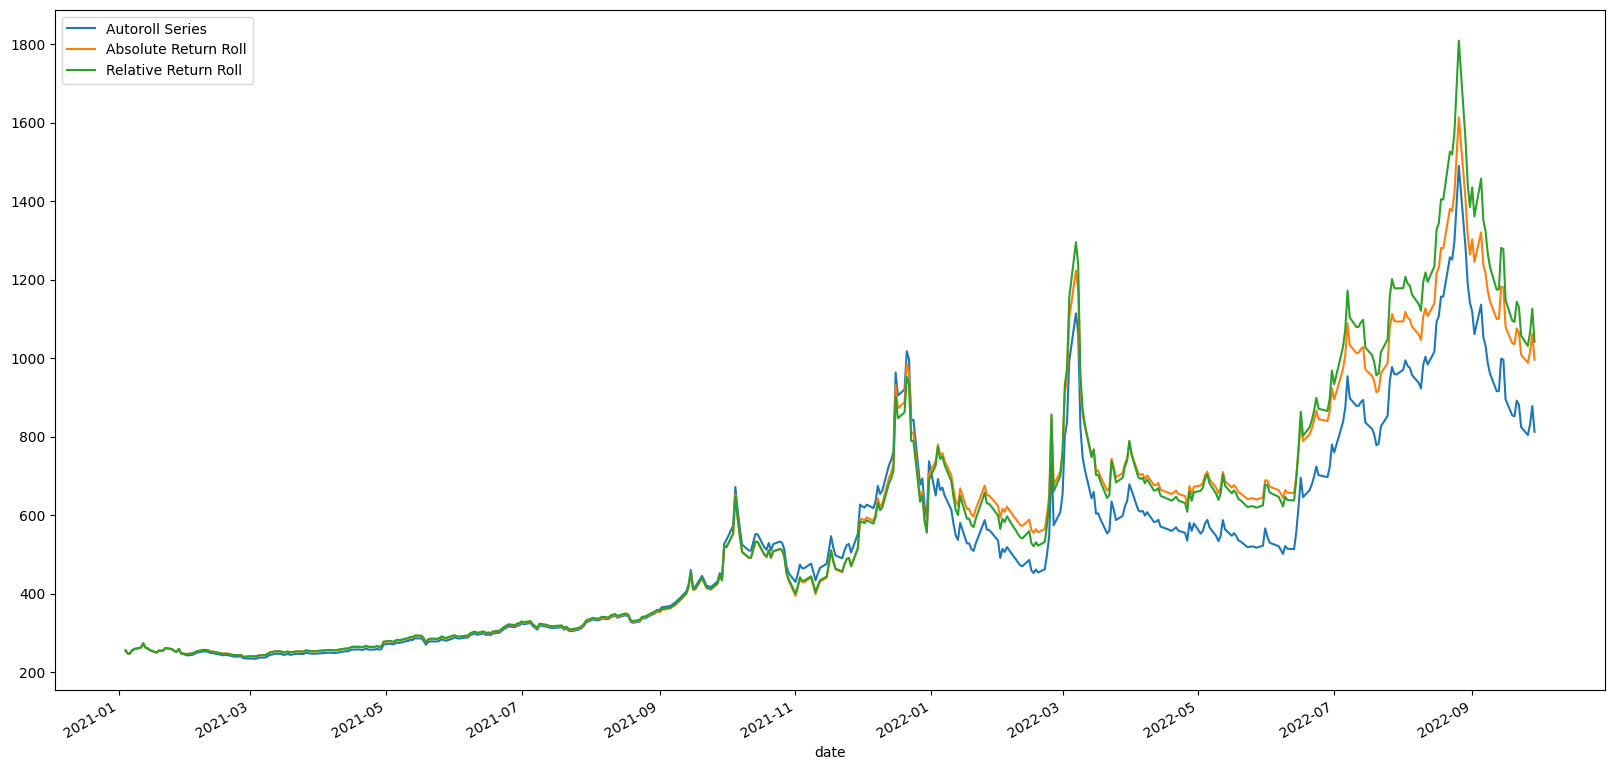

In [8]:
# Make a copy of the first contract
continuous_contract_absolute_method = continuous_contract.copy()
continuous_contract_relative_method = continuous_contract.copy()
# Apply the roll gaps
continuous_contract_absolute_method["close"] -= roll_gaps_absolute
continuous_contract_relative_method["close"] /= roll_gaps_relative
# Plot
fig = plt.figure(figsize=(20, 10))
_ = continuous_contract.close.plot(label="Autoroll Series")
_ = continuous_contract_absolute_method.close.plot(label="Absolute Return Roll")
_ = continuous_contract_relative_method.close.plot(label="Relative Return Roll")
_ = plt.legend(loc="best")
plt.show() 

In [9]:
from mlfinlab.data_structures import time_data_structures
# Get processed tick data csv from url

time_bars = time_data_structures.get_time_bars(
    continuous_contract_relative_method, resolution="D", verbose=False
)
time_bars  

<frozen mlfinlab.util.fast_ewma>:17: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


AttributeError: 'float' object has no attribute 'timestamp'